In [54]:
#!pip install networkx --user
import numpy as np
import networkx as nx
print("Networkx version: {}".format(nx.__version__))
from time import time
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set()

print("numpy version: {}".format(np.__version__))
print("Networkx version: {}".format(nx.__version__))

from scipy.stats import norm
import numexpr
numexpr.print_versions()
%matplotlib inline

Networkx version: 2.4
numpy version: 1.18.1
Networkx version: 2.4
*Warning*: NumPy version is lower than recommended: 1.18.1 < 1.7.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Numexpr version:   2.6.8
NumPy version:     1.18.1
Python version:    3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Platform:          linux-x86_64-#1 SMP Fri Jun 12 14:34:17 EDT 2020
CPU vendor:        
CPU model:         
CPU clock speed:    MHz
VML available?     True
VML/MKL version:   Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
Number of threads used by default: 8 (out of 64 detected cores)
Maximum number of threads: 64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [55]:
import tensorflow as tf
print(tf.__version__)

import os
print(os.environ['HOME'])
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

if tf.test.gpu_device_name() == '/device:GPU:0':
  print("Using a GPU")
else:
  print("Using a CPU")

import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

from tensorflow_probability import edward2 as ed
tfd = tfp.distributions

2.0.0
/u/yan30
Using a GPU


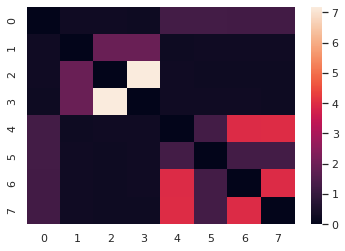

In [71]:
Gorig = nx.read_edgelist("data/resnik.txt", delimiter='\t' , nodetype=str,  data=(('weight',float),))
for u,v,d in Gorig.edges(data=True):
    Gorig[u][v]['weight']= Gorig[u][v]['weight'] + np.random.normal(0,0.01)
H = Gorig.subgraph(['ACD', 'ABL1', 'ACTL6A', 'ACTR5', 'ACTR8', 'ALKBH1', 'ALKBH2', 'ALKBH3'])
mapping = {'ACD':6, 'ABL1':3, 'ACTL6A':7, 'ACTR5':5, 'ACTR8':0, 'ALKBH1':1, 'ALKBH2':2, 'ALKBH3':4}
G0 = nx.relabel_nodes(H, mapping)
A = nx.adjacency_matrix(G0).todense()
ax = sns.heatmap(A)

In [4]:
import networkx as nx
from networkx import relabel

Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
terms = nx.get_node_attributes(Gnew, 'term')
len(terms)

437

In [26]:
import pandas as pd

df = pd.read_csv('data/pearl2015.txt', sep='\t', header=None)
#df.to_csv('pdTest.csv')
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
genes = [u for u,v,e in Gref.edges(data=True) if e[2] == 'Gene-Term']
genes

['LIG1',
 'LIG1',
 'LIG1',
 'LIG1',
 'LIG3',
 'LIG3',
 'PARP1',
 'PARP1',
 'XRCC1',
 'XRCC1',
 'XRCC1',
 'APEX1',
 'APEX2',
 'AMN1',
 'BRCC3',
 'CCNA2',
 'CCNB2',
 'CCNB3',
 'CDKN1A',
 'CDKN1A',
 'MDC1',
 'MDC1',
 'PER1',
 'PER2',
 'PER3',
 'TP53BP1',
 'TP53BP1',
 'ACTL6A',
 'ACTR5',
 'ACTR8',
 'ARID1A',
 'ARID1B',
 'ARID2',
 'BAZ1A',
 'BRD7',
 'CHRAC1',
 'INO80',
 'INO80C',
 'INO80D',
 'INO80E',
 'MCRS1',
 'NFRKB',
 'PBRM1',
 'POLE3',
 'POLE3',
 'RUVBL1',
 'RUVBL2',
 'SMARCA2',
 'SMARCA4',
 'SMARCA5',
 'SMARCB1',
 'SMARCC1',
 'SMARCC2',
 'SMARCD1',
 'SMARCE1',
 'TFPT',
 'NCAPD2',
 'NCAPD3',
 'NCAPG',
 'NCAPH',
 'NCAPH2',
 'PDS5A',
 'PDS5B',
 'RAD21',
 'SMC1A',
 'SMC1B',
 'SMC2',
 'SMC3',
 'SMC4',
 'STAG1',
 'STAG2',
 'MMS22L',
 'TONSL',
 'ALKBH2',
 'ALKBH3',
 'MGMT',
 'CRY1',
 'CRY2',
 'MBD4',
 'MPG',
 'MUTYH',
 'NEIL1',
 'NEIL2',
 'NEIL3',
 'NTHL1',
 'OGG1',
 'SMUG1',
 'TDG',
 'UNG',
 'PCNA',
 'PCNA',
 'PCNA',
 'PCNA',
 'POLD1',
 'POLD1',
 'POLD2',
 'POLD2',
 'POLD3',
 'POLD3',
 'POL

In [6]:
def get_level(level):
    for child in Gref.nodes():
        if Gref.nodes[child]['level'] == level: #get all nodes at level
            newLevel = level
            for parent in Gref.successors(child): #get parents one level above
                newLevel = level+1
                if newLevel > Gref.nodes[parent]['level']: #check if the parent's level needs to be raised
                    Gref.nodes[parent]['level'] = newLevel
    return newLevel

for node in Gref.nodes():
    if len(Gref.in_edges(node, data=True)) == 0: #terminal nodes
        Gref.nodes[node]['level'] = 0
    else: Gref.nodes[node]['level'] = -1
level = 0
newLevel = 0
while  newLevel == level:
    newLevel = get_level(level)
    level += 1
    print(newLevel)
        
sorted(Gref.nodes(data=True), key=lambda t: t[1].get('level', 1), reverse = True)

1
2
3
4
5
5


[('Repair pathway', {'level': 5}),
 ('Associated process', {'level': 4}),
 ('Telomere maintenance', {'level': 3}),
 ('Ubiquitin response', {'level': 3}),
 ('SSR', {'level': 3}),
 ('Alternative mechanism', {'level': 2}),
 ('Checkpoint factors', {'level': 2}),
 ('TLS', {'level': 2}),
 ('BER', {'level': 2}),
 ('Deubiquitinating enzyme (DUB)', {'level': 2}),
 ('DSR', {'level': 2}),
 ('Genes with probable DDR role', {'level': 2}),
 ('MMR', {'level': 2}),
 ('NER', {'level': 2}),
 ('Ubiquitin- activating enzymes (E1)', {'level': 2}),
 ('Ubiquitin- conjugating enzymes (E2)', {'level': 2}),
 ('Ubiquitin ligases (E3)', {'level': 2}),
 ('Ubiquitin-like proteins (UBLs)', {'level': 2}),
 ('Ubiquitins and Ubiquitin-like proteins', {'level': 2}),
 ('MRN Complex', {'level': 1}),
 ('Alt-NHEJ', {'level': 1}),
 ('AP endonucleases', {'level': 1}),
 ('Chromatin remodelling', {'level': 1}),
 ('Chromosome segregation', {'level': 1}),
 ('DNA replication', {'level': 1}),
 ('Modulation of nucleotide pools', {'l

In [7]:
#Define the joint_log_prob function, and our unnormalized posterior.
def SBM_prob(G, k, labels, directed=False, selfloops=False):
  # the SBM log-likelihood generative steps
    n = len(G)
    z = labels
    eta = ed.Normal(loc=10, scale=1, name="eta", sample_shape=[k,k]) #beta prior for simple edges
    # parameters to sample the adjacency matrix
    # p[i, j] = eta[z[i], z[j]] is the parameter corresponding to A[i, j]
    # very inefficient parameterization
    tile_a = tf.tile(tf.expand_dims(z, 1), [1, tf.shape(z)[0]])  
    tile_a = tf.expand_dims(tile_a, 2) 
    tile_b = tf.tile(tf.expand_dims(z, 0), [tf.shape(z)[0], 1]) 
    tile_b = tf.expand_dims(tile_b, 2)
    p = tf.gather_nd(eta, tf.concat([tile_a, tile_b], axis=2))
    #if not selfloops:
    #    TT.set_subtensor(p[np.diag_indices(n)], 0.)
    #if not directed:
    #    p = eta[(z.reshape((n, 1)), z.reshape((1, n)))][triu_indices] #replace with equation 5.5 for analytical posterior, including DC?
    #if weighted:
    #    A = ed.Poisson(name = 'A', mu=p, shape=A_obs[0].shape, observed=A_obs) #collect edge/non-edge statistics for the analytical posterior
    #else:
    A = ed.Normal(name = 'A', loc=p, scale=1)
    return A

In [8]:
log_joint = ed.make_log_joint_fn(SBM_prob)
# Function to compute the log posterior probability
n = len(Gorig)
A_obs = tf.convert_to_tensor(nx.to_numpy_array(Gorig), dtype=tf.float32)

#def setParameters(k, label):
k = 3
label = np.random.randint(low = 0, high = 3, size = n) 

def target_log_prob_fn(eta):
  return log_joint(
      G = Gorig,
      k = label.max()+1,
      labels = label,
      eta = eta,
      A=A_obs)

# set initial state (drawn from prior built from OG subgraphs)
#
#
# Prior design will be key here, needs external input
#eta = tf.random.uniform([k,k], minval=0, maxval=1, dtype=tf.float32)

peta = ed.Normal(loc=10, scale=1, name="eta", sample_shape=[k,k]) 
x = target_log_prob_fn(peta) #test the target_log_prob_fn with initial state
print(x)
#np.exp(-300)

/home/yan30/.tfProb/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: tfp.edward2 module is deprecated and will be removed on 2019-12-01. Use https://github.com/google/edward2 library instead.
  """Entry point for launching an IPython kernel.


tf.Tensor(-8379672.5, shape=(), dtype=float32)


In [66]:
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
k = len(Gnew)
label = np.arange(k)
label[k-4]=0
label[k-3]=0
label[k-2]=0
label[k-1]=0

knew = max(label)+1 
peta = ed.Normal(loc=10, scale=1, name="eta", sample_shape=[knew,knew]) 
median, states = sampleMedian(peta,target_log_prob_fn)
states

array([[ 1.5972512,  4.8982544,  4.698593 , ...,  4.353587 ,  3.942659 ,
         4.382294 ],
       [ 4.8874087,  8.867155 ,  9.176218 , ...,  8.581532 ,  7.7367353,
         8.807314 ],
       [ 4.729666 ,  9.017835 ,  8.885667 , ...,  7.925498 ,  9.537366 ,
         8.860068 ],
       ...,
       [ 4.314918 ,  9.199303 ,  8.463847 , ...,  7.20237  ,  8.276614 ,
         8.980278 ],
       [ 4.237628 ,  8.151327 , 10.194496 , ...,  8.977914 ,  7.9871035,
         9.350866 ],
       [ 4.297018 ,  7.712956 ,  9.052544 , ...,  9.270914 ,  9.194437 ,
         7.0570726]], dtype=float32)

In [67]:
states.shape

(433, 433)

In [9]:
Nsamples = 100  # final number of samples
Nburn = 100     # number of tuning samples

# set up Hamiltonian MC
def sampleMedian(peta, target_log_prob_fn):
    hmc_kernel = tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=target_log_prob_fn,
        step_size=0.01,
        num_leapfrog_steps=5)

    states, kernel_results = tfp.mcmc.sample_chain(
        num_results=Nsamples,
        num_burnin_steps=Nburn,
        current_state=[peta],
        trace_fn=(lambda current_state, kernel_results: kernel_results),
        parallel_iterations=100,
        kernel=hmc_kernel)
    return np.median(kernel_results.proposed_results.target_log_prob.numpy()), tf.reduce_mean(states, axis=[0, 1]).numpy() ##median for posterior estimates
#kernel_results.is_accepted.numpy().mean()

In [10]:
# Merge quasi-cliques with more than 3 overlapping nodes
def merge_cliques(Clist):
    for i in range(0, len(Clist)):
        c1 = Clist[i]
        for j in range(i+1, len(Clist)):
            c2 = Clist[j]
            if (len(c1.intersection(c2))>1): # define quasi-cliques with number of overlapping nodes
                c3 = c1.union(c2)
                Clist.insert(0,c3)
                Clist.remove(c1)
                Clist.remove(c2)
                return merge_cliques(Clist)
    return Clist

In [11]:
import networkx.algorithms.clique as clique
import itertools as it
import random 

def getCandidatesB(G, Gref, labels):
    parentList = []
    for source, target in Gref.edges():
        if len(Gref.in_edges(source, data=True)) == 0: #leaf nodes (genes)
            tup = (target,Gref.nodes[target]['level'])
            parentList.append(tup)
    #random.shuffle(parentList)
    tmp = sorted(parentList, key=lambda t: t[1]) #sort leaves by level
    parentSet = list(set(parentList))

    merges = []
    for parent in parentSet[:5]:
        c = []
        for predecessor in Gref.predecessors(parent[0]): #only include leaves
            if len(Gref.in_edges(predecessor, data=True)) == 0:
                c.append(predecessor)
        merges.append(set(c))
    print(merges)
    
    CliXO = {}    
    nodeSet = sorted(set().union(*merges))
    for x in nodeSet:
        CliXO[x] = []
        for idx, y in enumerate(merges): 
            if (x in y) and len(CliXO[x])<3: #only top 2 appearance are considered in Bayesian assignments
                CliXO[x].append(idx)
    combinations = it.product(*(CliXO[Name] for Name in nodeSet))    
    Llist = []
    for update in combinations:
        labelsNew = labels.copy()
        for idx, x in enumerate(update):        
            nodeIDs = [x for x,y in G.nodes(data=True) if y['term']==nodeSet[idx]]
            if nodeIDs!=[]:
                labelsNew[nodeIDs[0]] = len(labels)+x #assign brand new block labels
        b,c =np.unique(labelsNew, return_inverse=True)
        Llist.append(c)
    return Llist

In [131]:
import networkx.algorithms.clique as clique
import itertools as it

def getCandidates(G, labels):
    edgesTop=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse=True)
    #percent = int(len(edgesTop)/5000) # adjust for layer size
    eList = [(x[0],x[1]) for x in edgesTop[:15]]
    sub = G.edge_subgraph(eList)
    graphs = [sub.subgraph(c) for c in nx.connected_components(sub)]
    print(len(graphs))
    max_clique_sets = [clique.find_cliques(s) for s in graphs]
    cliques = []
    for clist in max_clique_sets:
        tmp = []
        for c in clist:
            if (len(c)>=2): #(len(c)<=3) control size of cliques
                cohesion = 0
                for idx, x in enumerate(c):
                    for idy, y in enumerate(c):
                        if (idy>idx):
                            cohesion = cohesion + G[x][y]['weight']
                tup = (set(c),cohesion/(len(c)-1)/(len(c)-1)) #higher order cliques prioritized
                tmp.append(tup)
        tmp = sorted(tmp, key=lambda t: t[1]) #sort cliques
        cliques += tmp[:3] #keep only top 3 cliques for each component
    
    CliList = sorted(cliques, key=lambda t: t[1])
    print(CliList)
    cliquesFiltered0 = [x[0] for x in CliList]
    cliquesFiltered = merge_cliques(cliquesFiltered0)

    CliXO = {}    
    nodeSet = sorted(set().union(*cliquesFiltered))
    for x in nodeSet:
        CliXO[x] = []
        for idx, y in enumerate(cliquesFiltered): 
            if (x in y) and len(CliXO[x])<3: #only top 2 appearance are considered in Bayesian assignments
                CliXO[x].append(idx)
    combinations = it.product(*(CliXO[Name] for Name in nodeSet))
    Llist = []
    for update in combinations:
        labelsNew = labels.copy()    
        for idx, x in enumerate(update):
            labelsNew[nodeSet[idx]] = len(labels)+x #assign brand new block labels
        b,c =np.unique(labelsNew, return_inverse=True) #Re-arranged block labels
        Llist.append(c)
    return Llist

In [72]:
def buildLayer(Gnew, Gref, Llist):
    Mlist = []
    A_obs = tf.convert_to_tensor(nx.to_numpy_array(Gnew), dtype=tf.float32)
    for iteration in range (0,len(Llist)):
        label = Llist[iteration]
        knew = max(label)+1 
        def target_log_prob_fn(eta):
          return log_joint(
              G = Gnew,
              k = knew,
              labels = label,
              eta = eta,
              A=A_obs)
        # set initial state (drawn from prior built from OG subgraphs)
        # Prior strength tuning parameter
        # Prior design will be key here, needs external input from corresponding OG layer
        totalW = sum(sum(nx.to_numpy_array(Gref)))
        GrefBlkVars = np.random.normal(loc = totalW/len(Gref)/(len(Gref)-1)*2, scale = 1, size = (knew,knew))
        for i in range(knew):
            for j in range(knew): 
                if (j==i): # only update diagonal entries for efficiency
                    id1, id2 = zip(*it.product(np.where(label==i)[0],np.where(label==j)[0])) #cartesian product of the i j blocks
                    totalW = sum(nx.to_numpy_array(Gref)[id1, id2]) #total edge weights of the block pair
                    GrefBlkVars[i,j] = totalW/len(id1) #averaged over possible edges of the block pair, needs upper-trianglize optimization
        GrefBlkVars = tf.convert_to_tensor(np.maximum(GrefBlkVars, GrefBlkVars.T), dtype=tf.float32)
        #peta = ed.Normal(loc=GrefBlkVars, scale=1, name="eta")
        #peta = tf.random.uniform([knew,knew], minval=0, maxval=1, dtype=tf.float32)
        #tf.reshape(tf.concat([petaA, petaB], axis=1),[2,1])
        median, states = sampleMedian(GrefBlkVars,target_log_prob_fn)
        tup = (iteration, median, states) #tuple for index and posterior
        Mlist.append(tup)
    #Mlist = np.exp(Mlist - max(Mlist))
    #norm = [float(i)/sum(Mlist) for i in Mlist] 
    return sorted(Mlist, key=lambda t: t[1], reverse = True) #higher order cliques prioritized

In [15]:
def updateDAG(G, NodeMerge, terms):
    size = len(NodeMerge);
    nodeSet = sorted(set().union(*NodeMerge))
    A = nx.adjacency_matrix(G).todense()
    while len(NodeMerge)>0:
        nodes = NodeMerge.pop()
        newNodeV = np.sum(A[nodes,:],axis=0)/len(nodes)
        B = np.vstack([A, newNodeV])
        newNodeC = np.sum(B[:,nodes],axis=1)/len(nodes)
        A = np.column_stack([B, newNodeC])
        
    #print(nodeSet)
    A = np.delete(A, nodeSet, axis = 0)
    #print(A.shape)
    A = np.delete(A, nodeSet, axis = 1)
    dt=[('weight',float)]
    A = np.matrix(A,dtype=dt)
    np.fill_diagonal(A, 0)
    Gnew = nx.from_numpy_matrix(A)
    Gnew = relabel.convert_node_labels_to_integers(Gnew,label_attribute = "term") 
    
    for node in nodeSet:
        if node in terms:
            del terms[node]
    return Gnew, {i:v for i,(k,v) in enumerate(terms.items(),0)}

In [224]:
def updateDAGB(G, Gref, NodeMerge, terms):
    nodeSet = sorted(set().union(*NodeMerge))
    while len(NodeMerge)>0:
        nodes = NodeMerge.pop()
        G.add_node(terms[len(G)-len(NodeMerge)])
        target = terms[len(G)-len(NodeMerge)]
        for source in nodes:
            if G.has_node(source):
                G = nx.contracted_nodes(G, target, source, self_loops=False) 
            #if len(Gref.in_edges(Gref[terms[target]], data=True)) == 0: #update OG ref DAG
            if Gref.has_node(terms[source]):
                targetRef = Gref.successors(terms[source])
                for targetRef0 in targetRef:
                    Gref = nx.contracted_nodes(Gref, targetRef0, terms[source], self_loops=False) 
                    Gref.nodes[targetRef0]['level'] = 10
                    break
    #for node in Gref.nodes():
    #    if len(Gref.in_edges(node, data=True)) == 0: #terminal nodes
    #        Gref.nodes[node]['level'] = 0
    #    else: Gref.nodes[node]['level'] = -1   
    #level = 0
    #newLevel = 0
    #while  newLevel == level:
    #    newLevel = get_level(level)
    #    level += 1
    
    G = relabel.convert_node_labels_to_integers(G)
    for node in nodeSet:
        if node in terms:
            del terms[node]
    return G, Gref, {i:v for i,(k,v) in enumerate(terms.items(),0)}

In [208]:
terms[nodes[2]]

'RPA3'

In [219]:
#Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
#len(Gnew)
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
target = Gref.successors('HLTF')
for test in target:
    print(test)

epistasis group


In [161]:
#Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
#terms = nx.get_node_attributes(Gnew, 'term') # initilaizatial dictionary for ddot ontology output
terms[len(terms)] = "subsystem0"
Gnew.add_node(terms[len(terms)-1])
target = terms[len(terms)-1]
for source in nodes:
    if Gnew.has_node(source):
        Gnew = nx.contracted_nodes(Gnew, target, source, self_loops=False) 

In [225]:
from collections import Counter
from networkx import relabel

#def f():
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
terms = nx.get_node_attributes(Gnew, 'term') # initilaizatial dictionary for ddot ontology output
model2 = [] # for ddot ontology output
subsystem = 0 # for ddot ontology output
loop = 0
#
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
for node in Gref.nodes():
    if len(Gref.in_edges(node, data=True)) == 0: #terminal nodes
        Gref.nodes[node]['level'] = 0
    else: Gref.nodes[node]['level'] = -1
level = 0
newLevel = 0
while  newLevel == level:
    newLevel = get_level(level)
    level += 1

#Supervised merging steps, controlled by number_of_edges    
while True:    
    k = len(Gnew)
    label = np.arange(k)
    print(k)
    Llist = getCandidatesB(Gnew, Gref, label)
    ModelPosterior = buildLayer(Gnew, Gnew, Llist)
    print(ModelPosterior)
    newInternal = [x for x in ModelPosterior[:5]] # keep top 10 Bayesian assignemtns
    NodeMerge = [] #nodes to be merged, nested lists of motifs
    for node in Gnew.nodes():
        model2.append(str(loop)+"th loop:"+terms[node])
    for i in range (0,len(newInternal)): #recreate the filtered merges
        newLabel = Llist[newInternal[i][0]]
        #print(newLabel)        
        dup = [item for item, count in Counter(newLabel).items() if count > 1] #list only duplicate labels where merges happen
        for dupL in dup: 
            nodes = [idx for idx,label in enumerate(newLabel) if label==dupL]
            #if(all(not set(nodes).issubset(set(x)) for x in NodeMerge)):
            if nodes not in NodeMerge:
                NodeMerge.append(nodes)
                for node in nodes: #update ddot ontology with new merges
                    model2.append((terms[node],"subsystem"+str(subsystem),"ddot",newInternal[i][1],newInternal[i][2],newLabel)) #update ddot ontology
                terms[len(terms)] = "subsystem"+str(subsystem)
                subsystem += 1
        model2.append((str(i)+"th posterior",newLabel))
    print(NodeMerge)
    Gnew, Gref, terms = updateDAGB(Gnew, Gref, NodeMerge, terms) #update the graph with node mergers/splits
    loop += 1
    if Gnew.number_of_edges() <= 55266:
        break  
        
print("entering un-supervised stage")        
#consistency between ref and bayesian posterior required after Supervised levels    
while True:
    k = len(Gnew)
    label = np.arange(k)
    print(k)
    Llist = getCandidates(Gnew, label)
    ModelPosterior = buildLayer(Gnew, Gnew, Llist)
    print(ModelPosterior)
    newInternal = [x for x in ModelPosterior[:10]] # keep top 10 Bayesian assignemtns
    #newInternal = np.where(np.asarray(ModelPosterior) > thresh)[0] #keep Bayesian candidates above threshold
    NodeMerge = [] #nodes to be merged, nested lists of motifs
    for node in Gnew.nodes():
        model2.append(str(loop)+"th loop:"+terms[node])
    for i in range (0,len(newInternal)): #recreate the filtered merges
        newLabel = Llist[newInternal[i][0]]
        #print(newLabel)        Gnew
        dup = [item for item, count in Counter(newLabel).items() if count > 1] #list only duplicate labels where merges happen
        for dupL in dup: 
            nodes = [idx for idx,label in enumerate(newLabel) if label==dupL]
            #if(all(not set(nodes).issubset(set(x)) for x in NodeMerge)):
            if nodes not in NodeMerge:
                NodeMerge.append(nodes)
                for node in nodes: #update ddot ontology with new merges
                    model2.append((terms[node],"subsystem"+str(subsystem),"ddot",newInternal[i][1],newInternal[i][2],newLabel)) #update ddot ontology
                terms[len(terms)] = "subsystem"+str(subsystem)
                subsystem += 1
        model2.append((str(i)+"th posterior",newLabel))
    print(NodeMerge)
    Gnew, terms = updateDAG(Gnew, NodeMerge, terms) #update the graph with node mergers/splits
    loop += 1
    if Gnew.number_of_edges() <=0:
        break    

437
[{'XRCC5', 'RNF8', 'MDC1', 'XRCC2', 'DNTT', 'ATM', 'POLL', 'NHEJ1', 'XRCC3', 'XRCC4', 'RNF168', 'RAD50', 'XRCC6', 'APLF', 'PARG', 'APTX', 'MRE11A', 'PRKDC', 'LIG4', 'POLB', 'POLM', 'PARP3', 'PNKP', 'TP53BP1', 'DCLRE1C'}, {'RFC3', 'RFC5', 'RFC1', 'RFC2', 'RFC4'}, {'RAD18', 'UBE2V2', 'UBE2A', 'UBE2B', 'UBE2N', 'HLTF'}, {'RPA4', 'RPA2', 'RPA1', 'RPA3'}, {'RAD18', 'RNF8'}]
[(3, -4758775.5, array([[1.7867132 , 2.2598925 , 3.1075044 , ..., 2.7178032 , 2.4159749 ,
        3.501954  ],
       [2.7019796 , 1.6771663 , 3.7251198 , ..., 2.0398464 , 2.338338  ,
        3.0348673 ],
       [2.8815522 , 3.5987582 , 1.1245313 , ..., 2.900358  , 1.2650673 ,
        1.9761341 ],
       ...,
       [2.6932006 , 1.8165593 , 2.5807307 , ..., 5.1042767 , 0.68386286,
        4.602664  ],
       [2.2071683 , 3.0602796 , 2.034236  , ..., 0.9917336 , 5.2140894 ,
        1.834207  ],
       [3.0031052 , 3.133772  , 2.0485258 , ..., 4.392298  , 2.1719773 ,
        3.4075968 ]], dtype=float32)), (2, -4761374.

KeyError: 'term'

In [133]:
from collections import Counter
from networkx import relabel

#def f():
#H = Gorig.subgraph(['ACD', 'ABL1', 'ACTL6A', 'ACTR5', 'ACTR8', 'ALKBH1', 'ALKBH2', 'ALKBH3'])
#Gnew = relabel.convert_node_labels_to_integers(H, label_attribute = "term") #initilaization
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
terms = nx.get_node_attributes(Gnew, 'term') # initilaizatial dictionary for ddot ontology output
hierarchy = [] # for ddot ontology output
model = [] # for generative modeling
subsystem = 0 # for ddot ontology output
loop=0
#
print("entering un-supervised stage")        
#consistency between ref and bayesian posterior required after Supervised levels    
while True:
    k = len(Gnew)
    label = np.arange(k)
    print(k)
    Llist = getCandidates(Gnew, label)
    ModelPosterior = buildLayer(Gnew, Gnew, Llist)
    print(ModelPosterior)
    newInternal = [x for x in ModelPosterior[:10]] # keep top 10 Bayesian assignemtns
    #newInternal = np.where(np.asarray(ModelPosterior) > thresh)[0] #keep Bayesian candidates above threshold
    NodeMerge = [] #nodes to be merged, nested lists of motifs
    for node in Gnew.nodes():
        model.append(str(loop)+"th loop:"+terms[node])
    for i in range (0,len(newInternal)): #recreate the filtered merges
        newLabel = Llist[newInternal[i][0]]
        #print(newLabel)        Gnew
        dup = [item for item, count in Counter(newLabel).items() if count > 1] #list only duplicate labels where merges happen
        for dupL in dup: 
            nodes = [idx for idx,label in enumerate(newLabel) if label==dupL]
            #if(all(not set(nodes).issubset(set(x)) for x in NodeMerge)):
            if nodes not in NodeMerge:
                NodeMerge.append(nodes)
                for node in nodes: #update ddot ontology with new merges
                    model.append((terms[node],"subsystem"+str(subsystem),"ddot", newInternal[i][1],newInternal[i][2],newLabel)) #update ddot ontology
                terms[len(terms)] = "subsystem"+str(subsystem)
                subsystem += 1
        model.append((str(i)+"th posterior",newLabel))
    print(NodeMerge)
    Gnew, terms = updateDAG(Gnew, NodeMerge, terms) #update the graph with node mergers/splits
    loop += 1
    if Gnew.number_of_edges() <=0:
        break    

entering un-supervised stage
437
13
[({237, 157}, 7.190652200287022), ({179, 175}, 7.190754960671134), ({166, 7}, 7.1927485275148175), ({403, 404}, 7.1935023363047925), ({409, 407}, 7.1954634868563945), ({403, 405}, 7.200901625463613), ({409, 412}, 7.20138608193137), ({51, 236}, 7.763811415517284), ({385, 170}, 7.766622117824986), ({380, 382}, 7.77057589864664), ({421, 54}, 7.771853587836772), ({80, 79}, 7.775287458290289), ({401, 402}, 7.777143589509873), ({12, 13}, 7.780094238533899), ({177, 178}, 7.781872518816875)]
[(3, -5263310.0, array([[1.6120044 , 3.8623219 , 4.3722377 , ..., 3.8117707 , 1.7567025 ,
        1.356672  ],
       [3.2569537 , 0.97929674, 2.7385921 , ..., 2.3777397 , 2.5827727 ,
        3.0993438 ],
       [3.365561  , 2.8482351 , 1.3536079 , ..., 2.666833  , 2.657434  ,
        2.4711387 ],
       ...,
       [4.071705  , 2.644343  , 2.7566833 , ..., 4.567351  , 1.7798827 ,
        2.70928   ],
       [1.3503255 , 3.8264887 , 4.3552113 , ..., 2.6049073 , 4.3124228

In [135]:
#{i:v for i,(k,v) in enumerate(terms.items(),0)}
terms

{0: 'subsystem523'}

In [126]:
del terms[0]
{i:v for i,(k,v) in enumerate(terms.items(),0)}

{0: 'subsystem312', 1: 'subsystem313', 2: 'subsystem314'}

In [136]:
model.reverse()
model

[('0th posterior', array([0, 0, 0, 0])),
 ('subsystem522',
  'subsystem523',
  'ddot',
  -61.683155,
  array([[0.8000157]], dtype=float32),
  array([0, 0, 0, 0])),
 ('subsystem521',
  'subsystem523',
  'ddot',
  -61.683155,
  array([[0.8000157]], dtype=float32),
  array([0, 0, 0, 0])),
 ('subsystem519',
  'subsystem523',
  'ddot',
  -61.683155,
  array([[0.8000157]], dtype=float32),
  array([0, 0, 0, 0])),
 ('subsystem514',
  'subsystem523',
  'ddot',
  -61.683155,
  array([[0.8000157]], dtype=float32),
  array([0, 0, 0, 0])),
 '81th loop:subsystem522',
 '81th loop:subsystem521',
 '81th loop:subsystem519',
 '81th loop:subsystem514',
 ('0th posterior', array([3, 3, 0, 3, 3, 3, 1, 3, 2])),
 ('subsystem520',
  'subsystem522',
  'ddot',
  -664.3083,
  array([[2.080622 , 2.9462152, 2.7617884, 0.7657745],
         [3.1141117, 1.4349277, 2.2339177, 1.6517055],
         [3.2116065, 2.6434853, 1.4251037, 2.3213568],
         [1.2637523, 1.8958453, 2.6161718, 1.2398373]], dtype=float32),
  array

In [129]:
#model.reverse()
model0 = model

In [137]:
import pickle

with open('resultNew/hierarchy-base.save', 'wb') as fp:
    pickle.dump(model, fp)

In [290]:
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
genes = [u for u,v,e in Gref.edges(data=True) if e[2] == 'Gene-Term']
len(Gnew.nodes())-len(set(genes))
for u in Gref.nodes(data=True):
    [x for x,y in Gnew.nodes(data=True) if y['term']==5]

In [18]:
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
Gnew.nodes(data=True)

NodeDataView({0: {'term': 'ACD'}, 1: {'term': 'ABL1'}, 2: {'term': 'ACTL6A'}, 3: {'term': 'ACTR5'}, 4: {'term': 'ACTR8'}, 5: {'term': 'ALKBH1'}, 6: {'term': 'ALKBH2'}, 7: {'term': 'ALKBH3'}, 8: {'term': 'AMN1'}, 9: {'term': 'ANKRD28'}, 10: {'term': 'ANKRD44'}, 11: {'term': 'ANKRD52'}, 12: {'term': 'APEX1'}, 13: {'term': 'APEX2'}, 14: {'term': 'APITD1'}, 15: {'term': 'APLF'}, 16: {'term': 'APTX'}, 17: {'term': 'ARID1A'}, 18: {'term': 'ARID1B'}, 19: {'term': 'ARID2'}, 20: {'term': 'ASF1A'}, 21: {'term': 'ASF1B'}, 22: {'term': 'ATF2'}, 23: {'term': 'ATM'}, 24: {'term': 'ATR'}, 25: {'term': 'ATRIP'}, 26: {'term': 'ATRX'}, 27: {'term': 'ATXN3'}, 28: {'term': 'BAP1'}, 29: {'term': 'BARD1'}, 30: {'term': 'BAZ1A'}, 31: {'term': 'BAZ1B'}, 32: {'term': 'BCAS2'}, 33: {'term': 'BLM'}, 34: {'term': 'BRCA1'}, 35: {'term': 'BRCA2'}, 36: {'term': 'BRCC3'}, 37: {'term': 'BRD7'}, 38: {'term': 'BRE'}, 39: {'term': 'BRIP1'}, 40: {'term': 'BTG2'}, 41: {'term': 'CCDC98'}, 42: {'term': 'CCNA1'}, 43: {'term':

In [19]:
k = len(Gnew)
print(k)
labels = np.arange(k)
parentList = []
for source, target in Gref.edges(): #calculate logLikeRatio along edges
    if len(Gref.in_edges(source, data=True)) == 0: #leaf nodes (genes)
        parentList.append(target)
random.shuffle(parentList)
parentSet = set(parentList[:5])      
print(parentSet)

merges = []
for parent in parentSet:
    c = []
    for predecessor in Gref.predecessors(parent): #updat
        #print(predecessor)
        if len(Gref.in_edges(predecessor, data=True)) == 0:
            c.append(predecessor)
    merges.append(set(c))
print(merges)
        
CliXO = {}    
nodeSet = sorted(set().union(*merges))
for x in nodeSet:
    CliXO[x] = []
    for idx, y in enumerate(merges): 
        if (x in y) and len(CliXO[x])<3: #only top 2 appearance are considered in Bayesian assignments
            CliXO[x].append(idx)
combinations = it.product(*(CliXO[Name] for Name in nodeSet))    
Llist = []
for update in combinations:
    #print(update)
    labelsNew = labels.copy()    
    for idx, x in enumerate(update):        
        nodeIDs = [x for x,y in Gnew.nodes(data=True) if y['term']==nodeSet[idx]]
        labelsNew[nodeIDs[0]] = len(labels)+x
    b,c =np.unique(labelsNew, return_inverse=True)
    Llist.append(c)

437
{'HR (Homologous Recombination)', 'Ubiquitins', 'FA (Fanconi anemia pathway)', 'Chromosome segregation', 'GGR (Global genome repair)'}
[{'BRCA2', 'NBN', 'RECQL', 'SMC6', 'RAD50', 'NSMCE4A', 'NFATC2IP', 'RAD51B', 'RAD52', 'KAT5', 'SHFM1', 'PPP4C', 'BLM', 'BRCA1', 'H2AFX', 'MUS81', 'HELQ', 'RAD51', 'SLX4', 'SMC5', 'HFM1', 'RAD51D', 'EID3', 'NSMCE1', 'RECQL4', 'NSMCE2', 'PPP4R1', 'SPO11', 'UIMC1', 'PPP4R2', 'RECQL5', 'RAD54L', 'RAD54B', 'GEN1', 'EME2', 'RMI2', 'RPA4', 'TOP3A', 'TOP3B', 'SLX1A', 'RDM1', 'PPP4R4', 'RPA3', 'RPA1', 'PARG', 'WRN', 'RPA2', 'RAD51C', 'PAXIP1', 'EME1'}, {'UBB', 'UBD', 'UBC'}, {'BRCA2', 'CCDC98', 'BARD1', 'FANCE', 'KAT5', 'FANCB', 'BLM', 'BRCA1', 'FANCI', 'FANCC', 'PALB2', 'HELQ', 'HES1', 'RAD51', 'FANCD2', 'DNA2', 'WDR48', 'FAAP24', 'USP1', 'STRA13', 'BRIP1', 'FAAP100', 'FANCA', 'UBE2T', 'TELO2', 'FANCG', 'FANCL', 'APITD1', 'TOP3B', 'RMI2', 'FAN1', 'TOP3A', 'BRE', 'FANCM', 'RAD51C'}, {'NCAPH2', 'RAD21', 'SMC2', 'PDS5A', 'NCAPH', 'STAG1', 'STAG2', 'NCAPG', 'NC

In [20]:
with open('resultNew/hierarchyQnew2Merge.save', 'wb') as fp:
    pickle.dump(list(G_new.edges), fp)

NameError: name 'G_new' is not defined

In [ ]:
sorted([n for n in G.in_degree()], reverse=True)  # degree sequence
inDegrees = G.in_degree()
for node, iDegree in inDegrees():    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if iDegree == 3:
        print(node)

In [ ]:
for n, nbrs in G.adj.items():
    print(G.nodes.data()[n])
    print(G.in_edges(n, data=True))

In [168]:
edgesTop

[(37, 41, {'weight': 0.46338258810827154}),
 (39, 41, {'weight': 0.46342259586930573}),
 (37, 39, {'weight': 0.49452518307424564}),
 (38, 40, {'weight': 0.5027900328758241}),
 (40, 41, {'weight': 0.6104133051269953}),
 (38, 41, {'weight': 0.6104533128880295}),
 (38, 39, {'weight': 0.6174001534933211}),
 (37, 40, {'weight': 0.6177419673970208}),
 (39, 40, {'weight': 0.7107079151081408}),
 (37, 38, {'weight': 0.7111697522949432}),
 (35, 36, {'weight': 0.7413329407797467}),
 (35, 41, {'weight': 0.7420696281628172}),
 (36, 41, {'weight': 0.7425076455300896}),
 (35, 37, {'weight': 0.7556340387417457}),
 (36, 37, {'weight': 0.7565245253711643}),
 (36, 40, {'weight': 0.7624530492320752}),
 (35, 40, {'weight': 0.7626533424112574}),
 (35, 39, {'weight': 0.7795635008568786}),
 (36, 39, {'weight': 0.7804197204186437}),
 (36, 38, {'weight': 0.7863482442795546}),
 (35, 38, {'weight': 0.7865828045263903}),
 (8, 9, {'weight': 0.831431396674901}),
 (8, 18, {'weight': 0.8331954386265357}),
 (8, 36, {'w